<a href="https://colab.research.google.com/github/xlr8r53/Stock-Market-Prediction-/blob/main/projaapl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd

In [103]:
df=pd.read_csv('AAPL.csv')

In [104]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-10-31,14.372143,14.618929,14.323214,14.456429,12.412530,385501200
1,2011-11-01,14.193214,14.267857,14.043571,14.161071,12.158929,531790000
2,2011-11-02,14.288929,14.301429,14.111071,14.193214,12.186525,327350800
3,2011-11-03,14.252500,14.407143,14.120000,14.395357,12.360092,441386400
4,2011-11-04,14.358214,14.408571,14.255714,14.294286,12.273310,302229200
...,...,...,...,...,...,...,...
2511,2021-10-22,149.690002,150.179993,148.639999,148.690002,148.690002,58839600
2512,2021-10-25,148.679993,149.369995,147.619995,148.639999,148.639999,50720600
2513,2021-10-26,149.330002,150.839996,149.009995,149.320007,149.320007,60893400
2514,2021-10-27,149.360001,149.729996,148.490005,148.850006,148.850006,56094900


In [105]:
df1=df.reset_index()['Close']

In [106]:
df1

0        14.456429
1        14.161071
2        14.193214
3        14.395357
4        14.294286
           ...    
2511    148.690002
2512    148.639999
2513    149.320007
2514    148.850006
2515    152.570007
Name: Close, Length: 2516, dtype: float64

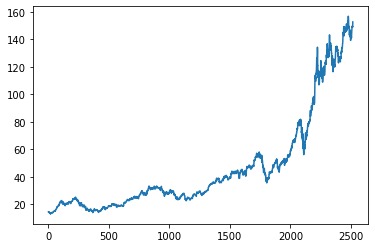

In [107]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [108]:
import numpy as np

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [110]:
print(df1)

[[0.01024169]
 [0.00818639]
 [0.00841006]
 ...
 [0.94871454]
 [0.94544396]
 [0.97133026]]


In [111]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [112]:
training_size,test_size

(1635, 881)

In [113]:

train_data

array([[0.01024169],
       [0.00818639],
       [0.00841006],
       ...,
       [0.19202735],
       [0.19714196],
       [0.20382232]])

In [114]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [115]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [116]:
print(X_train.shape), print(y_train.shape)

(1534, 100)
(1534,)


(None, None)

In [117]:
print(X_test.shape), print(ytest.shape)

(780, 100)
(780,)


(None, None)

In [118]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [119]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [120]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [121]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
24/24 [==============================] - 8s 192ms/step - loss: 0.0016 - val_loss: 0.0189
Epoch 2/100
24/24 [==============================] - 4s 150ms/step - loss: 1.8366e-04 - val_loss: 0.0065
Epoch 3/100
24/24 [==============================] - 4s 150ms/step - loss: 8.4082e-05 - val_loss: 0.0039
Epoch 4/100
24/24 [==============================] - 4s 149ms/step - loss: 7.7491e-05 - val_loss: 0.0039
Epoch 5/100
24/24 [==============================] - 4s 149ms/step - loss: 7.6859e-05 - val_loss: 0.0040
Epoch 6/100
24/24 [==============================] - 4s 152ms/step - loss: 7.8734e-05 - val_loss: 0.0055
Epoch 7/100
24/24 [==============================] - 4s 151ms/step - loss: 7.5723e-05 - val_loss: 0.0038
Epoch 8/100
24/24 [==============================] - 4s 150ms/step - loss: 8.0668e-05 - val_loss: 0.0054
Epoch 9/100
24/24 [==============================] - 4s 151ms/step - loss: 7.0608e-05 - val_loss: 0.0045
Epoch 10/100
24/24 [==============================] - 4s 15

In [123]:
import tensorflow as tf

In [124]:

tf.__version__

'2.6.0'

In [125]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [126]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [127]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

28.039165273502693

In [128]:
math.sqrt(mean_squared_error(ytest,test_predict))

93.01750020413205

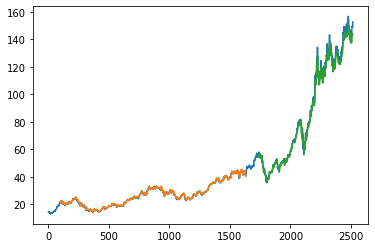

In [129]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [130]:
len(test_data)

881

In [135]:
x_input=test_data[781:].reshape(1,-1)
x_input.shape

(1, 100)

In [136]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [137]:
temp_input

[0.7943013036834626,
 0.7872034751327541,
 0.7958322208429264,
 0.8176128838730364,
 0.8117676112551934,
 0.8153165046544995,
 0.8267287373743661,
 0.8174737867639301,
 0.8302777351539132,
 0.8419682734309165,
 0.8400198492249688,
 0.8380018799438094,
 0.8359142542485143,
 0.847535240491623,
 0.8583212196004466,
 0.8627052245142788,
 0.8648623952847856,
 0.8835812727067474,
 0.8979161382561942,
 0.9156608000958407,
 0.9064057381464807,
 0.9194184470183887,
 0.9151736435939039,
 0.9231065349483593,
 0.9475314765401338,
 0.9428691730278481,
 0.9283255469964763,
 0.9009083231196688,
 0.9266554283476652,
 0.921436416299548,
 0.9311786347508447,
 0.9434258815636795,
 0.9464181638487122,
 0.9309698812276027,
 0.918513783469968,
 0.9231065349483593,
 0.924637459066506,
 0.9222715278140742,
 0.9350754831627403,
 0.9322223954083718,
 0.9329878574674452,
 0.9265858763137705,
 0.9262379213011812,
 0.9228282363499055,
 0.924637459066506,
 0.9457222538235336,
 0.9471836259077856,
 0.961240088478537

In [139]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,-1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.92171377]
101
1 day input [0.78720348 0.79583222 0.81761288 0.81176761 0.8153165  0.82672874
 0.81747379 0.83027774 0.84196827 0.84001985 0.83800188 0.83591425
 0.84753524 0.85832122 0.86270522 0.8648624  0.88358127 0.89791614
 0.9156608  0.90640574 0.91941845 0.91517364 0.92310653 0.94753148
 0.94286917 0.92832555 0.90090832 0.92665543 0.92143642 0.93117863
 0.94342588 0.94641816 0.93096988 0.91851378 0.92310653 0.92463746
 0.92227153 0.93507548 0.9322224  0.93298786 0.92658588 0.92623792
 0.92282824 0.92463746 0.94572225 0.94718363 0.96124009 0.95476856
 0.9281168  0.93048272 0.9408512  0.95142843 0.95080206 0.94203417
 0.93632799 0.94370428 0.97515745 0.9661808  0.97091266 0.97884555
 0.98336876 1.         0.98900527 0.98176829 0.94627896 0.95031501
 0.94036404 0.94669647 0.94502634 0.92602917 0.90431811 0.9077278
 0.92456791 0.93138739 0.93201364 0.92122766 0.89715068 0.90355266
 0.8942976  0.90230004 0.8778751  0.89158372 0.89777694 0.90675359
 0.90403971 0.90341346 0.89436715 

In [140]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [142]:
import matplotlib.pyplot as plt

In [143]:
len(df1)

2516

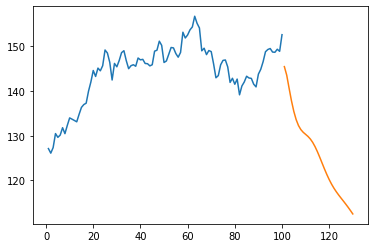

In [145]:
plt.plot(day_new,scaler.inverse_transform(df1[2416:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

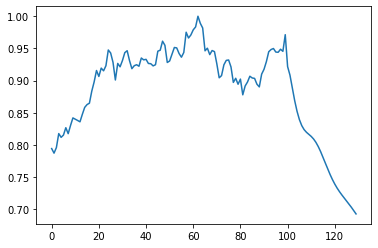

In [146]:

df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2416:])

In [147]:
df3=scaler.inverse_transform(df3).tolist()

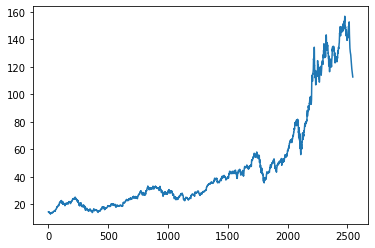

In [148]:
plt.plot(df3)